# Chr 21 analysis with transcription

In [12]:
import numpy as np
import scipy
import pickle
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import plot_functions
from tqdm.notebook import tqdm

import cmasher as cmr
from matplotlib import colors

cmap_relative = cmr.iceburn

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
distmap_on = np.load("distmap_on.npy")
distmap_off = np.load("distmap_off.npy")
rirjmap_on = np.load("rirjmap_on.npy")
rirjmap_off = np.load("rirjmap_off.npy")

In [38]:
rsquared = np.diag(rirjmap_chr21).reshape((N, 1))
np.tile(rsquared.T, (N, 1))

array([[3.83740519e+08, 3.84353167e+08, 3.83462332e+08, ...,
        3.83690743e+08, 3.83581179e+08, 3.83849950e+08],
       [3.83740519e+08, 3.84353167e+08, 3.83462332e+08, ...,
        3.83690743e+08, 3.83581179e+08, 3.83849950e+08],
       [3.83740519e+08, 3.84353167e+08, 3.83462332e+08, ...,
        3.83690743e+08, 3.83581179e+08, 3.83849950e+08],
       ...,
       [3.83740519e+08, 3.84353167e+08, 3.83462332e+08, ...,
        3.83690743e+08, 3.83581179e+08, 3.83849950e+08],
       [3.83740519e+08, 3.84353167e+08, 3.83462332e+08, ...,
        3.83690743e+08, 3.83581179e+08, 3.83849950e+08],
       [3.83740519e+08, 3.84353167e+08, 3.83462332e+08, ...,
        3.83690743e+08, 3.83581179e+08, 3.83849950e+08]])

In [39]:
def msdmap_from_rirjmap(rirj):
    rsquared = np.diag(rirj).reshape((N, 1))
    r2i = np.tile(rsquared, (1, N))
    r2j = np.tile(rsquared.T, (N, 1))
    msd = r2i - 2*rirj + r2j
    return msd

In [5]:
def contourmap_from_rirjmap(rirj):
    contour_corr = rirj[:-1, :-1] + rirj[1:, 1:] - rirj[1:, :-1] - rirj[:-1, 1:]
    return contour_corr

contourmap_on = contourmap_from_rirjmap(rirjmap_on)
contourmap_off = contourmap_from_rirjmap(rirjmap_off)

In [6]:
with open('rirj_combined_list.pkl', 'rb') as f:
    rirjmap_combined_list = pickle.load(f)

In [24]:
with open('distmap_combined_list.pkl', 'rb') as f:
    distmap_combined_list = pickle.load(f)

In [13]:
rirjmap_chr21 = np.zeros((651, 651))
countmap_chr21 = np.zeros((651, 651))
for rirj in tqdm(rirjmap_combined_list):
    countmap_chr21[~np.isnan(rirj)] += 1
    #convert nans to zero
    rirjmap_chr21 += np.nan_to_num(rirj)

  0%|          | 0/12149 [00:00<?, ?it/s]

In [25]:
distmap_chr21 = np.zeros((651, 651))
countmap_chr21 = np.zeros((651, 651))
for dist in tqdm(distmap_combined_list):
    countmap_chr21[~np.isnan(dist)] += 1
    #convert nans to zero
    distmap_chr21 += np.nan_to_num(dist)

distmap_chr21 /= countmap_chr21

  0%|          | 0/12149 [00:00<?, ?it/s]

In [14]:
#mean contour alignment for entire chromosome
rirjmap_chr21 /= countmap_chr21
contourmap_chr21 = contourmap_from_rirjmap(rirjmap_chr21)

In [40]:
msdmap_chr21 = msdmap_from_rirjmap(rirjmap_chr21)

In [42]:
#normalized contour map (bond alignment)
#first main diagonal of MD map is ||(r_{i+1} - r_i) ||
N = 651
bond_lengths = np.diag(distmap_chr21, 1) #N-1 vector
bond_length_squared = np.outer(bond_lengths, bond_lengths)
normalized_contourmap = contourmap_chr21 / bond_length_squared
#print(bond_lengths[0:10])
#print(bond_length_squared[0, 0:10])
print(np.diag(contourmap_chr21)[0:10])
print(np.diag(msdmap_chr21, 1)[0:10])

[ 193406.34415221  243275.13047135 1984103.84978318  595039.59042597
 -839957.73877609 -169490.54031491  -27985.05424774 -185044.60858321
   46793.11418915  407596.66792667]
[ 193406.34415227  243275.13047135 1984103.84978318  595039.59042597
 -839957.73877609 -169490.54031491  -27985.05424774 -185044.60858327
   46793.11418909  407596.66792661]


(120, 120)


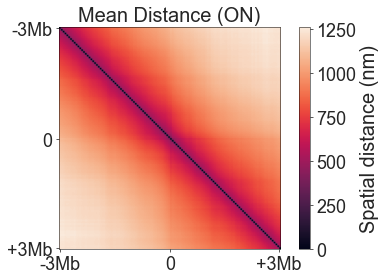

In [18]:
fig, ax = plt.subplots()
offset = 60
offset_Mb = offset * 0.05
center = 650
print(distmap_on[center-offset : center+offset, center-offset : center+offset].shape)
im = ax.imshow(distmap_on[center-offset : center+offset, center-offset : center+offset])
plt.colorbar(im, label='Spatial distance (nm)')
ax.set_xticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_yticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_title('Mean Distance (ON)', fontsize=20)
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_on_pilup.pdf')

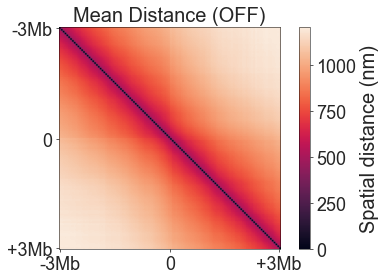

In [50]:
fig, ax = plt.subplots()
offset = 60
offset_Mb = offset * 0.05
center = 650
im = ax.imshow(distmap_off[center-offset : center+offset, center-offset : center+offset])
plt.colorbar(im, label='Spatial distance (nm)')
ax.set_xticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_yticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_title('Mean Distance (OFF)', fontsize=20)
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_off_pilup.pdf')

In [55]:
diff = on_pileup - off_pileup
print(np.min(diff))
print(np.max(diff))

-7.434650048867775e+01
59.718953622019626


In [ ]:
fig, ax = plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0.)
offset = 60
offset_Mb = offset * 0.05
center = 650
on_pileup = distmap_on[center-offset : center+offset, center-offset : center+offset]
off_pileup = distmap_off[center-offset : center+offset, center-offset : center+offset]
im = ax.imshow(on_pileup - off_pileup, cmap=cmap_relative, norm=divnorm)
plt.colorbar(im, label='Relative distance (nm)')
ax.set_xticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_yticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_title('ON - OFF Distance', fontsize=20)
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_pileup_relative.pdf')

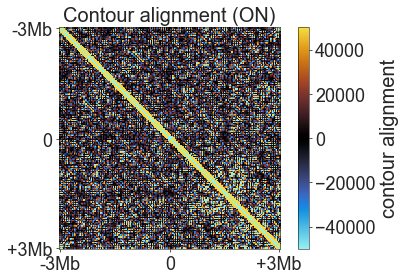

In [17]:
import cmasher as cmr
from matplotlib import colors

divnorm=colors.TwoSlopeNorm(vmin=-50000, vcenter=0., vmax=50000)

cmap_relative = cmr.iceburn

fig, ax = plt.subplots()
offset = 60
offset_Mb = offset * 0.05
center = 650
im = ax.imshow(contourmap_on[center-offset : center+offset, center-offset : center+offset],
              cmap=cmap_relative, norm=divnorm)
plt.colorbar(im, label='contour alignment')
ax.set_xticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_yticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_title('Contour alignment (ON)', fontsize=20)
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_on_pilup_contourmap.pdf')

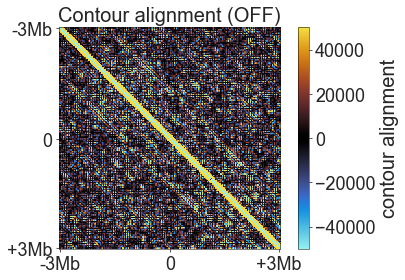

In [18]:
divnorm=colors.TwoSlopeNorm(vmin=-50000, vcenter=0., vmax=50000)
fig, ax = plt.subplots()
offset = 60
offset_Mb = offset * 0.05
center = 650
im = ax.imshow(contourmap_off[center-offset : center+offset, center-offset : center+offset],
              cmap=cmap_relative, norm=divnorm)
plt.colorbar(im, label='contour alignment')
ax.set_xticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_yticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_title('Contour alignment (OFF)', fontsize=20)
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_off_pilup_contourmap.pdf')

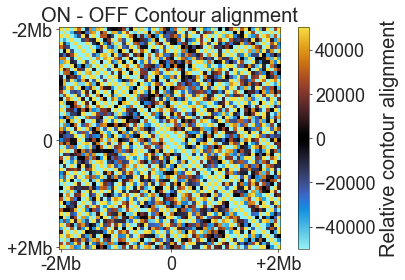

In [20]:
fig, ax = plt.subplots()
divnorm=colors.TwoSlopeNorm(vmin=-50000, vcenter=0., vmax=50000)
offset = 30
offset_Mb = offset * 0.05
center = 650
on_pileup = contourmap_on[center-offset : center+offset, center-offset : center+offset]
off_pileup = contourmap_off[center-offset : center+offset, center-offset : center+offset]
im = ax.imshow(on_pileup - off_pileup, cmap=cmap_relative, norm=divnorm)
plt.colorbar(im, label='Relative contour alignment')
ax.set_xticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_yticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_title('ON - OFF Contour alignment', fontsize=20)
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_pileup_relative_contour.pdf')

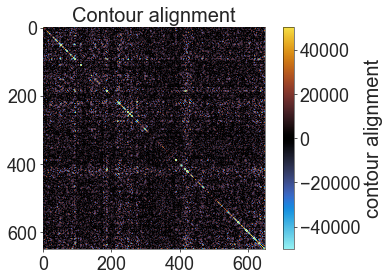

In [23]:
#contour alignment for entire chromosome
fig, ax = plt.subplots()
divnorm=colors.TwoSlopeNorm(vmin=-50000, vcenter=0., vmax=50000)
im = ax.imshow(contourmap_chr21, cmap=cmap_relative, norm=divnorm)
plt.colorbar(im, label='contour alignment')
#ax.set_xticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
#ax.set_yticks([0, offset, 2*offset - 1], [f'-{offset_Mb:.0f}Mb', '0', f'+{offset_Mb:.0f}Mb'])
ax.set_title('Contour alignment', fontsize=20)
fig.tight_layout()
#plt.savefig('../../plots/chr21_gene_on_pilup_contourmap.pdf')

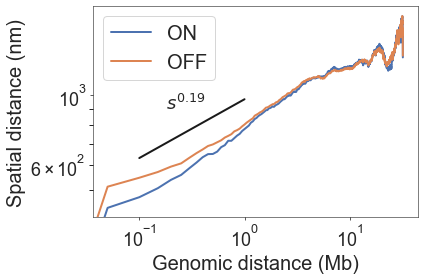

In [68]:
from plot_functions import draw_power_law_triangle

fig, ax = plt.subplots()
sdistances_Mb = np.arange(0, 651) * 0.05
distances_ON = distmap_on[center, center:]
distances_OFF = distmap_off[center, center:]
spatial_distances = distances_OFF - distances_ON
ax.plot(sdistances_Mb, distances_ON, label='ON')
ax.plot(sdistances_Mb, distances_OFF, label='OFF')
triangle_x0 = [-1, 2.8]
result = scipy.stats.linregress(np.log10(sdistances_Mb[1:int(0.6 * len(sdistances_Mb))]),
                                np.log10(distances_ON[1:(int(0.6 * len(sdistances_Mb)))]))
width = 1.0
base = 10
corner = draw_power_law_triangle(result.slope, triangle_x0, width, 'up', hypotenuse_only=True)
#text coordinates
x0, y0 = [base**x for x in triangle_x0]
x1 = x0*base**(width/4)
y1 = y0*(x1/x0)**result.slope
#ydiff = result.slope * (width/2) + result.intercept
ylo, yhi = ax.get_ylim()
#center text in the middle of the line
#offset text vertically from line 
text_y = y1 + 0.1 * (yhi - ylo)
ax.text(x1, text_y, f'$s^{{{result.slope:.2f}}}$', fontsize=18)
ax.set_xlabel('Genomic distance (Mb)')
ax.set_ylabel('Spatial distance (nm)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_distance_scalings.pdf')

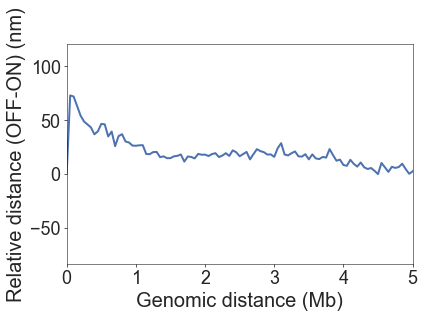

In [72]:
from plot_functions import draw_power_law_triangle

fig, ax = plt.subplots()
sdistances_Mb = np.arange(0, 651) * 0.05
distances_ON = distmap_on[center, center:]
distances_OFF = distmap_off[center, center:]
spatial_distances = distances_OFF - distances_ON
ax.plot(sdistances_Mb, spatial_distances)
ax.set_xlim(0, 5)
ax.set_xlabel('Genomic distance (Mb)')
ax.set_ylabel('Relative distance (OFF-ON) (nm)')
fig.tight_layout()
plt.savefig('../../plots/chr21_gene_distance_relative_scalings.pdf')